In [43]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [44]:
df=pd.read_csv("C:\\Users\\santo\\Downloads\\Country-data.csv")

In [45]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [66]:
#Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

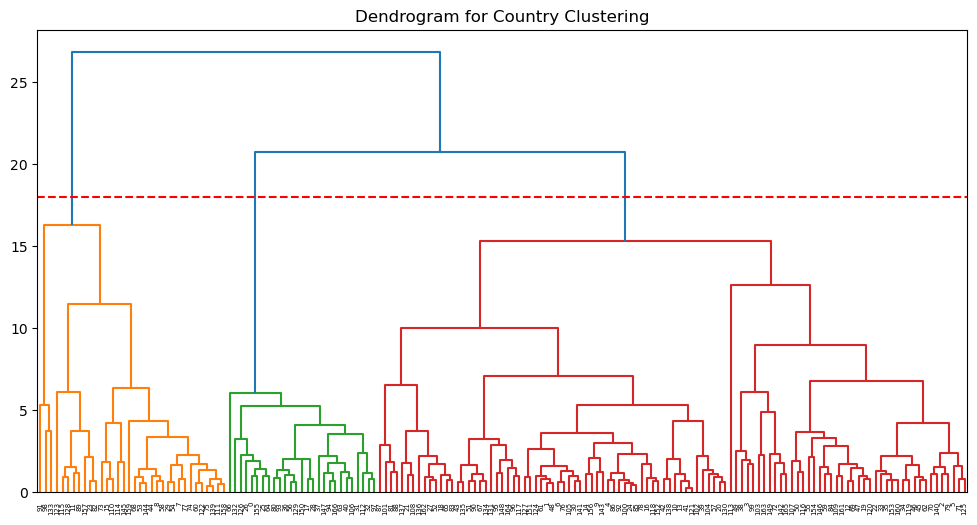

In [67]:
# Plot a dendrogram to find the best number of clusters
plt.figure(figsize=(12, 6))
plt.title("Dendrogram for Country Clustering")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=18, color='r', linestyle='--')  # optional guide line
plt.show()


In [68]:
# Apply Agglomerative Clustering with 3 clusters
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
cluster_labels = model.fit_predict(data_scaled)


In [69]:
cluster_labels

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [70]:
# Add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [71]:
# Drop non-numeric columns
features = df.drop(['country', 'Cluster'], axis=1).columns


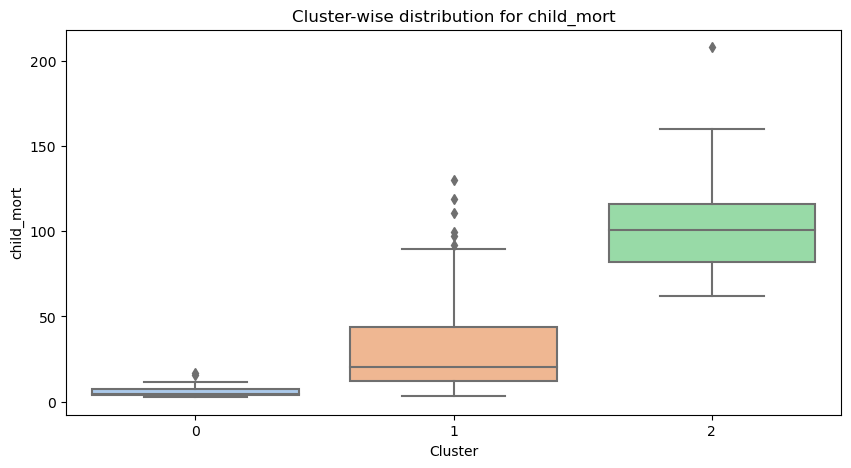

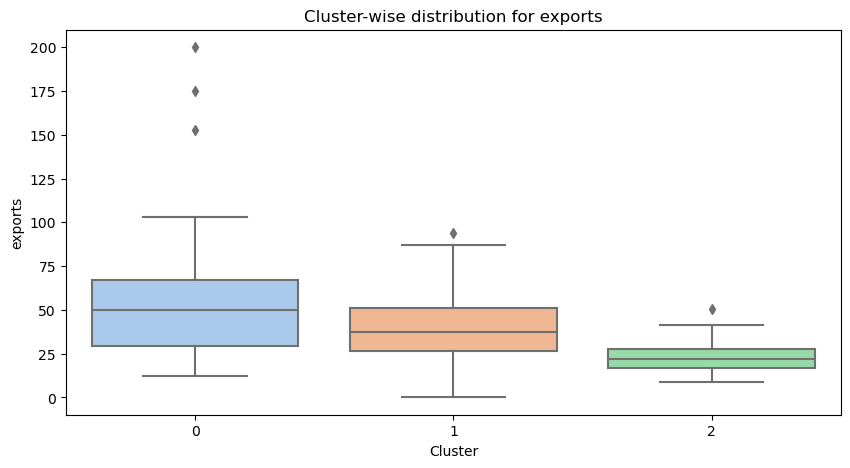

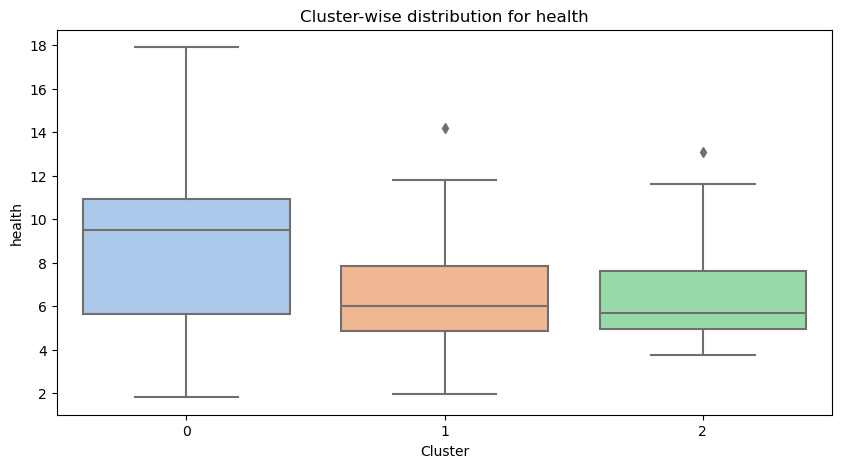

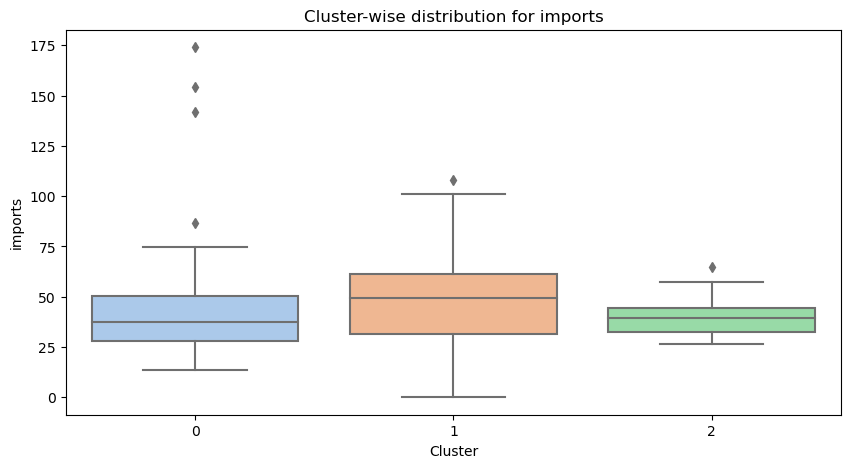

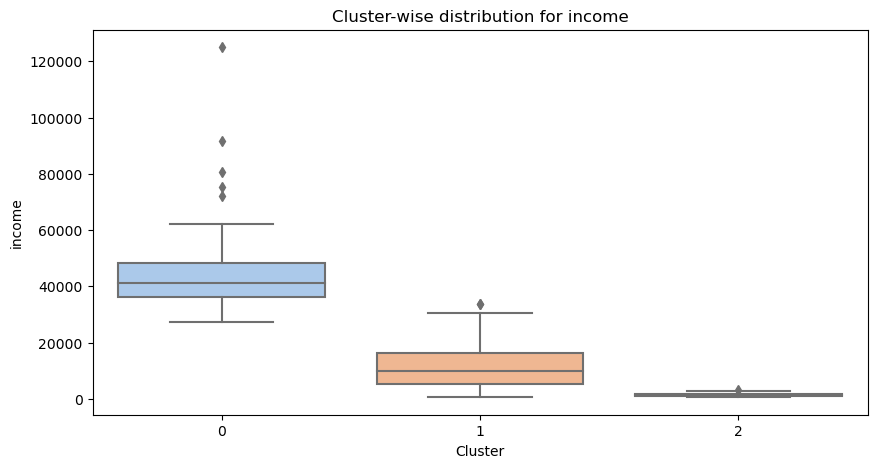

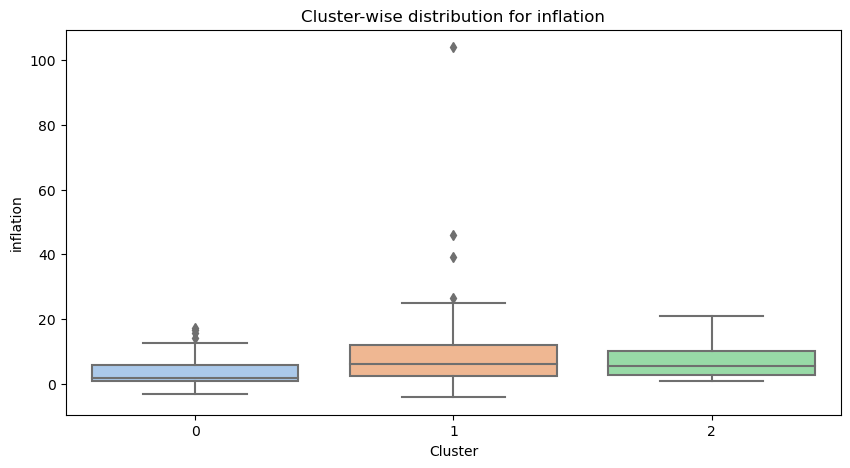

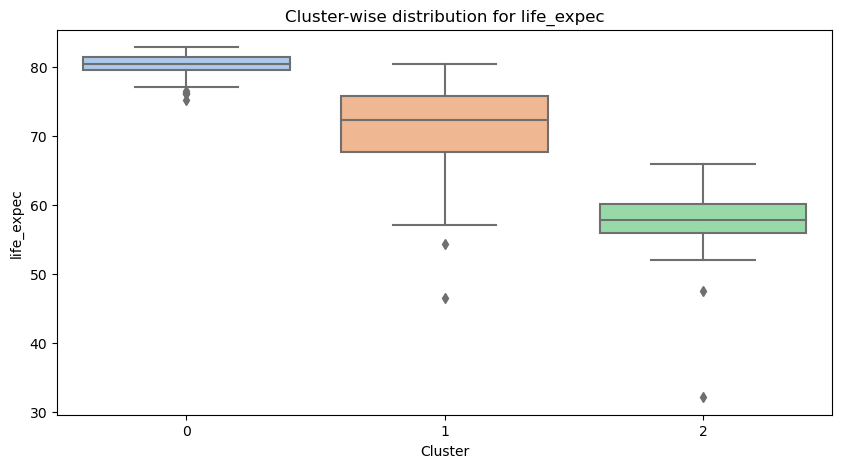

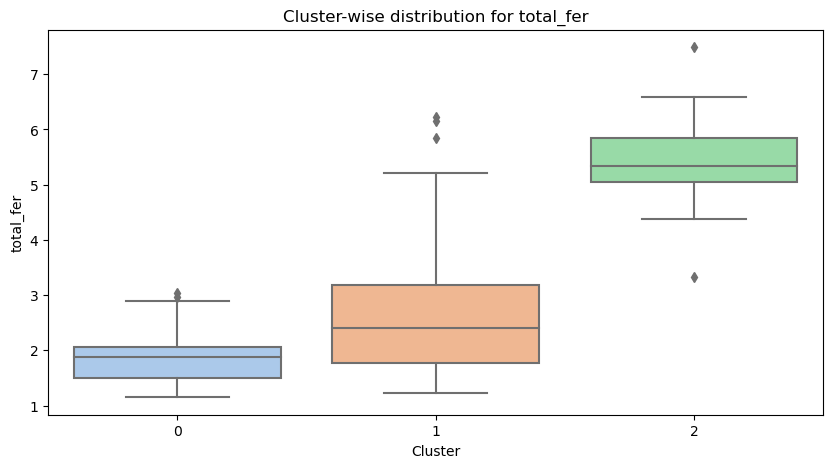

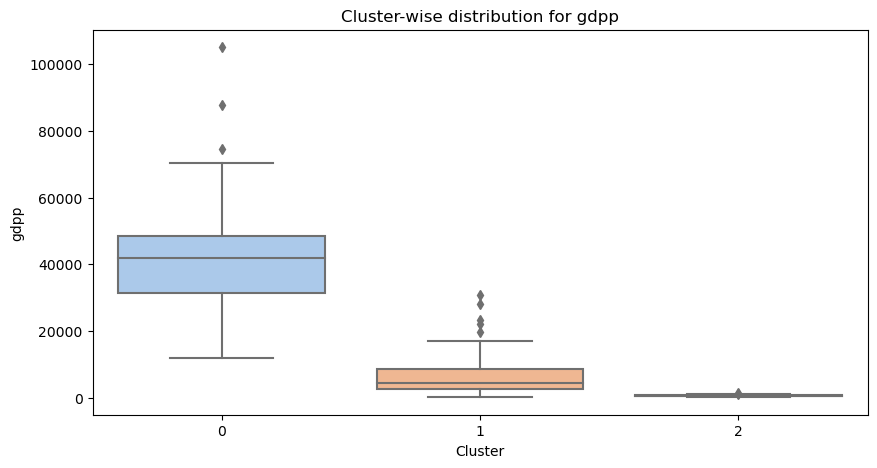

In [72]:
# Visualize clusters with boxplots for interpretation
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Cluster', y=feature, palette='pastel')
    plt.title(f'Cluster-wise distribution for {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

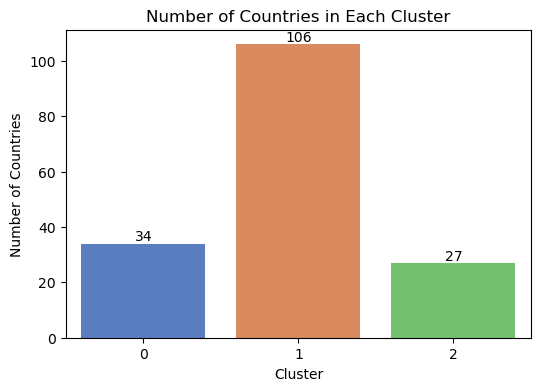

In [83]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='muted')
plt.title('Number of Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
# Add labels on top of bars
for i, value in enumerate(cluster_counts.values):
    plt.text(x=i, y=value + 1, s=str(value), ha='center')
plt.show()

C:\Users\santo\AppData\Local\Temp\ipykernel_15572\4159131160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_avg = df.groupby('Cluster').mean()


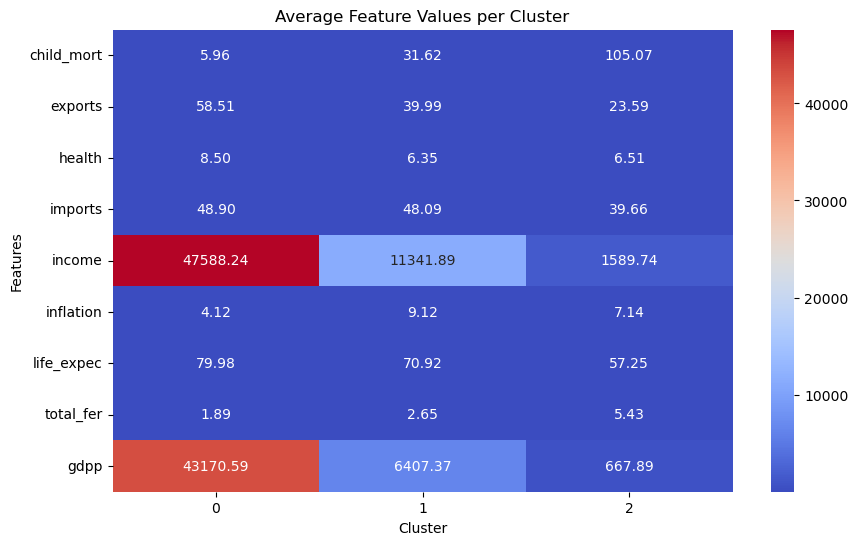

In [84]:
cluster_avg = df.groupby('Cluster').mean()

plt.figure(figsize=(10,6))
sns.heatmap(cluster_avg.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Average Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

In [73]:
# Evaluate clustering quality with Silhouette Score
score = silhouette_score(data_scaled, cluster_labels)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.246


In [74]:
df.groupby('Cluster').mean()


C:\Users\santo\AppData\Local\Temp\ipykernel_15572\1487914449.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889


In [58]:
for i in range(3):
    print(f"\nCountries in Cluster {i}:")
    print(df[df['Cluster'] == i]['country'].values)



Countries in Cluster 0:
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Libya' 'Luxembourg' 'Malta' 'Netherlands'
 'New Zealand' 'Norway' 'Oman' 'Portugal' 'Qatar' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']

Countries in Cluster 1:
['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Congo, Rep.' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Fiji' 'Gabon' 'Georgia' 'Ghana' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Jamaica' 'Jordan' 'Kazakhstan' 'Kiri

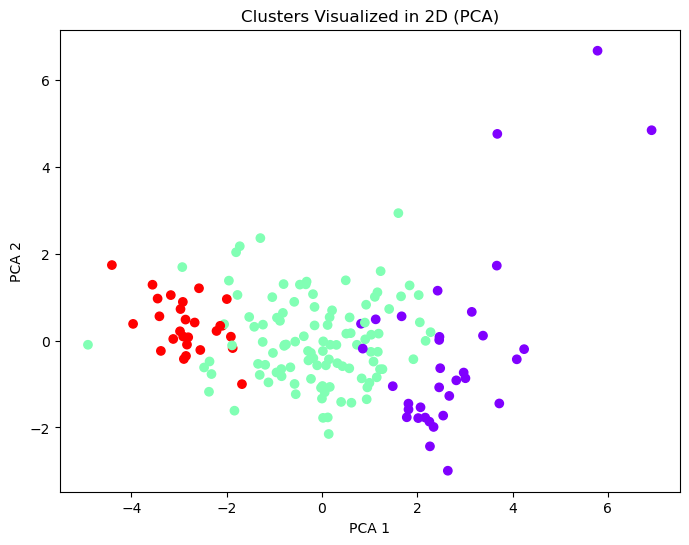

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [60]:
df.to_csv("Country_clusters.csv", index=False)